In [53]:
import requests   
import pandas as pd
from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [29]:
#fetching Mitv reviews from amazon
url="https://www.amazon.in/Mi-LED-Ready-Android-Black/product-reviews/B07HB7SSPZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
response = requests.get(url)
print(response.status_code)
# create soup object to iterate over the extracted content 
soup = bs(response.content,"html.parser")

200


In [63]:
# Extracting the content under specific tags  
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):    
    reviews[i] = reviews[i].text
    print(reviews[i])
    print('------------------------------------------------------')

I bought this TV, As it is an android TV it should have Amazon Prime & Netflix. But both applications are restricted in playstore by MI - So I told them to place a return request but they are not accepting it. Saying you should have to confirm it before placing an order. So now on If i will have to buy any android mobile, I will have to call them and confirm all the thousands of applications which is available in playstore - asking whether this applications are supported in mobile or not. Screen quality is too poor. I am prime member of Amazon - But I am saying now never buy anything from Amazon - Cancelling my subscription of Amazon prime as well

------------------------------------------------------
The picture quality is not good. Resolution is poor with HD connection of my DTH connected through an HDMI cable  even though it's an HD ready TV. I didn't find any difference in picture quality with HDMI and RCA inputs. Greenish hue with pixelated appearance of the image was seen even i

In [40]:
Mitv_reviews = pd.DataFrame(columns = ["reviews"])
Mitv_reviews["reviews"] = reviews
Mitv_reviews.head(6)

,reviews
0,"I bought this TV, As it is an android TV it sh..."
1,The picture quality is not good. Resolution is...
2,I will suggest all who are buying this in the ...
3,"I bought it in October. Got delivered fast, on..."
4,Installation takes ages.Still not installed 7 ...
5,Bad product marinated in marketing flavor.its ...


In [41]:
#checking the vader sentiment analysis
sia = SentimentIntensityAnalyzer()
a = 'It was the best day of my life.'
sia.polarity_scores(a)

{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}

In [42]:
def get_vader_sentiment(review): 
    
    sia = SentimentIntensityAnalyzer()
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [49]:
Mi  = []
rev = []

for i in range(4,8):
    parsed_rev = {} 
    parsed_rev['rev_id'] = i
    parsed_rev['vader_sentiment'] = get_vader_sentiment(reviews[i])
    Mi.append(reviews[i])  
    rev.append(parsed_rev)
    
rev

[{'rev_id': 4, 'vader_sentiment': 'neutral'},
 {'rev_id': 5, 'vader_sentiment': 'negative'},
 {'rev_id': 6, 'vader_sentiment': 'positive'},
 {'rev_id': 7, 'vader_sentiment': 'positive'}]

Within the range of 4 to 8 reviews, there are 2 positive, 1 negative and 1 neutral reviews

In [55]:
with open('Mi.txt','w',encoding='utf8') as output:
    output.write(str(Mitv_reviews))

In [50]:
Mitv_rev_string = " ".join(Mi)

# Ignoring unwanted symbols 
Mitv_rev_string = re.sub("[^A-Za-z" "]+"," ",Mitv_rev_string).lower()
Mitv_rev_string = re.sub("[0-9" "]+"," ",Mitv_rev_string)

In [51]:
Mitv_reviews_words = Mitv_rev_string.split(" ")

stop_words = stopwords.words('english')

Mitv_reviews_words = [w for w in Mitv_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
Mitv_rev_string = " ".join(Mitv_reviews_words)

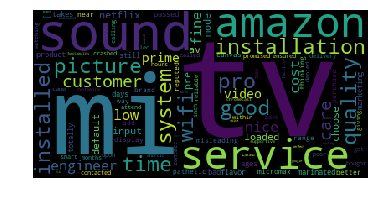

In [59]:
# Simple word cloud
wordcloud_Mi = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(Mitv_rev_string)

plt.imshow(wordcloud_Mi)
plt.axis("off")
plt.show()

In [60]:
# positive words 
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[2:]



# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[5:]


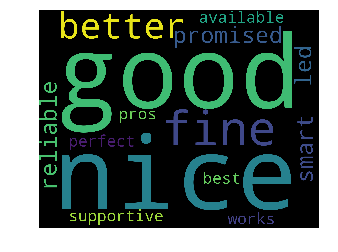

In [61]:
# Positive word cloud
Mi_pos_in_pos = " ".join ([w for w in Mitv_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(Mi_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

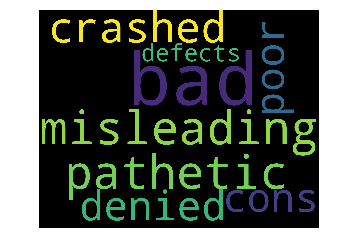

In [62]:
# negative word cloud
Mi_neg_in_neg = " ".join ([w for w in Mitv_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(Mi_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()